<a href="https://colab.research.google.com/github/bullbearyBots/tensorflow_certification/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

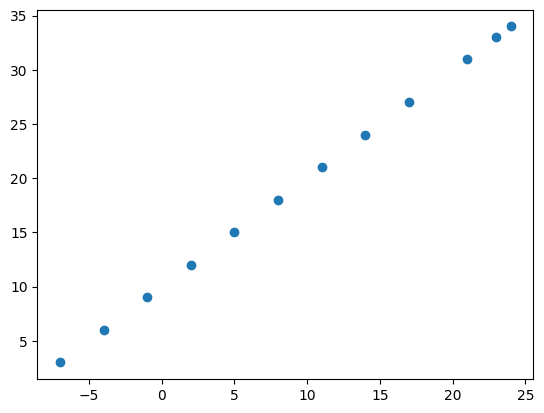

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 21.0, 23.0, 24.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 31.0, 33.0, 34.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((12,), (12,))

In [5]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X.shape, y.shape

(TensorShape([12]), TensorShape([12]))

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function and the optimizer and evaluation metrics
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), tf.expand_dims(X, axis=-1), epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.5141 - mae: 9.5141
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 8.2082 - mae: 8.2082
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 6.9023 - mae: 6.9023
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 5.5964 - mae: 5.5964
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 4.2905 - mae: 4.2905


In [8]:
# Check out X and y
X, y

(<tf.Tensor: shape=(12,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 21., 23., 24.],
       dtype=float32)>,
 <tf.Tensor: shape=(12,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 31., 33., 34.],
       dtype=float32)>)

In [9]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[12.562141]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units within each of those layers and we might change activation function of each layer.
2. **Compiling the model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** or on more data

In [10]:
# Let's rebuild our model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 678ms/step - loss: 29.7523 - mae: 29.7523
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 28.6253 - mae: 28.6253
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 27.4983 - mae: 27.4983
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 26.3713 - mae: 26.3713
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 25.2442 - mae: 25.2442
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 24.1172 - mae: 24.1172
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 23.0282 - mae: 23.0282
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 22.1315 - mae: 22.1315
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 21.2348 - mae: 21.2348
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 20.3380 - mae: 20.3380
Epoch 11/100
1/1 [==============================

In [11]:
model.predict([35.0])

1/1 [==============================] - 0s 98ms/step


array([[51.125637]], dtype=float32)

In [12]:
# Let's see if we can make another change to improve our model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation=None))
model.add(tf.keras.layers.Dense(128, activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 19.3731 - mae: 19.3731
Epoch 2/200
1/1 [==============================] - 0s 22ms/step - loss: 19.1359 - mae: 19.1359
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 18.8986 - mae: 18.8986
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 18.6614 - mae: 18.6614
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 18.4241 - mae: 18.4241
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 18.1867 - mae: 18.1867
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 17.9490 - mae: 17.9490
Epoch 8/200
1/1 [==============================] - 0s 19ms/step - loss: 17.7112 - mae: 17.7112
Epoch 9/200
1/1 [==============================] - 0s 19ms/step - loss: 17.4730 - mae: 17.4730
Epoch 10/200
1/1 [==============================] - 0s 20ms/step - loss: 17.2344 - mae: 17.2344
Epoch 11/200
1/1 [==============================] -

In [13]:
model.predict(tf.constant([35.0]))

1/1 [==============================] - 0s 348ms/step


array([[51.20203]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it
-> evaluate it -> tweak a model ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* THe model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the prediction of a model line up against the ground truth (the original labels)

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for the dataset
y = X + 10 # This is a formula we want our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

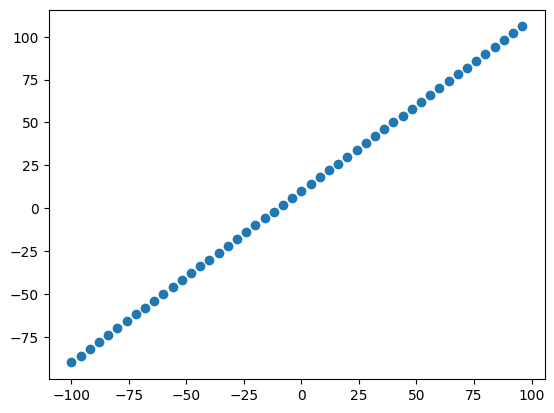

In [16]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### Three sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned. This is typically 10-15% of the total data available.

In [17]:
# Check the length of how many samples we have
len(X)

50

In [18]:
# Split the data into train and test sets
X_train = X[:40] # This is 80% of the data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets. Let's visualize it

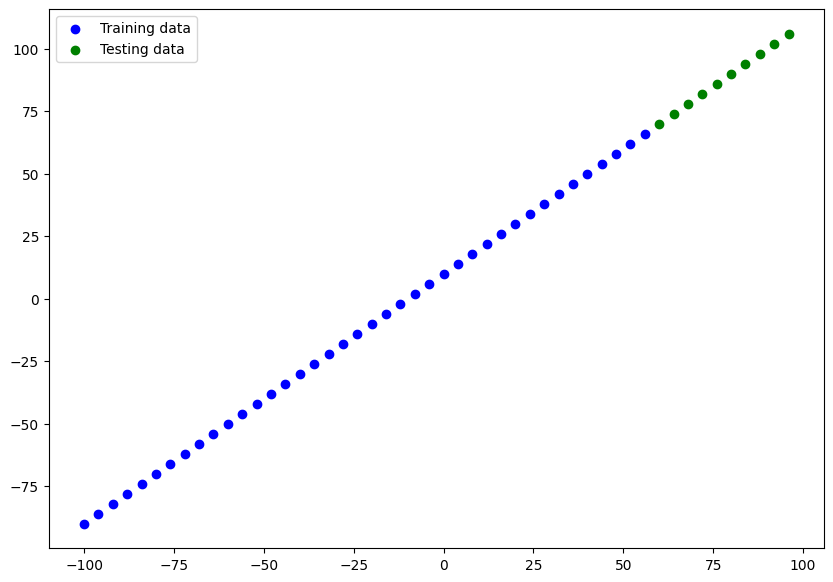

In [19]:
plt.figure(figsize=(10, 7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [20]:
# Let's have a look at how to build a neural network for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

# model.fit(X_train, y_train, epochs=100)

### Visualize the model

In [21]:
# model.summary()

In [22]:
# Let's create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="MODEL_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [23]:
model.summary()

Model: "MODEL_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updates during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [24]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

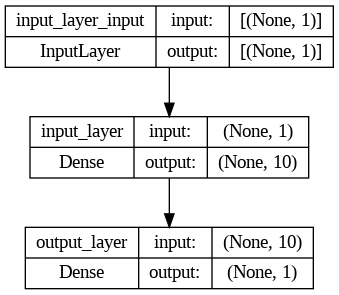

In [25]:
# Plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

## Visualize our model's predictions

TO visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' versus 'y_pred' (ground truth versus your model's predictions)

In [26]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 76.2377  ],
       [ 81.2055  ],
       [ 86.173294],
       [ 91.14108 ],
       [ 96.10889 ],
       [101.076675],
       [106.044464],
       [111.01227 ],
       [115.98006 ],
       [120.947845]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to
  ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  plt.scatter(test_data, predictions, c='r', label="Prediction data")
  plt.legend();

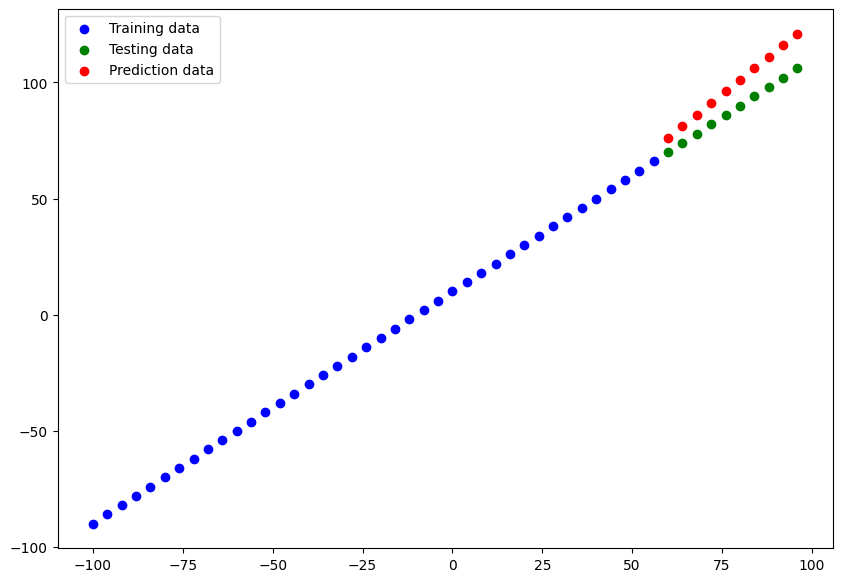

In [29]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's prediction
* MSE - mean square error, "square the average errors"

In [30]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 10.5928 - mae: 10.5928


[10.592777252197266, 10.592777252197266]

In [31]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

# Vectors should be of the same shape - otherwise it given bad results

<tf.Tensor: shape=(), dtype=float32, numpy=10.592777>

In [32]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test,
                                    tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=119.93408>

In [33]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your models more of a chance to find patterns in the data.

In [34]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Let's do three modelling experiments:

1. model_1 - same as the original model, 1 layer but trained for 100 epochs
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

In [35]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 74.3489 - mae: 74.3489
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 39.0220 - mae: 39.0220
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4698 - mae: 8.4698
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2480 - mae: 9.2480
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1047 - mae: 10.1047
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3782 - mae: 9.3782
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.5298 - mae: 8.5298
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0612 - mae: 9.0612
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6099 - mae: 18.6099
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0506 - mae: 10.0506
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 57ms/step


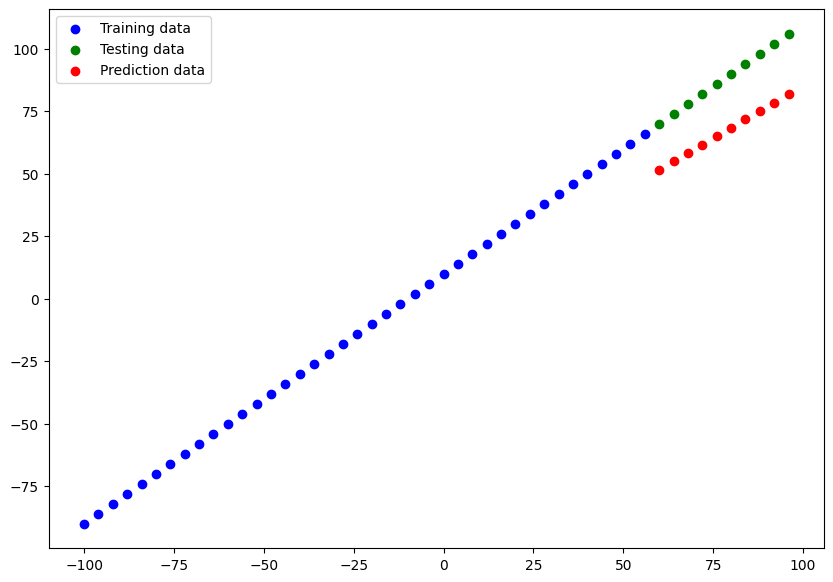

In [36]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [37]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.31547>,
 <tf.Tensor: shape=(), dtype=float32, numpy=457.7967>)

In [38]:
# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 29.4071 - mae: 29.4071
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 27.0339 - mae: 27.0339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 24.7485 - mae: 24.7485
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 22.4378 - mae: 22.4378
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 20.1732 - mae: 20.1732
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 17.9421 - mae: 17.9421
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 15.7147 - mae: 15.7147
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 13.4550 - mae: 13.4550
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 11.4321 - mae: 11.4321
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 9.6577 - mae: 9.6577
Epoch 11/500
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 45ms/step


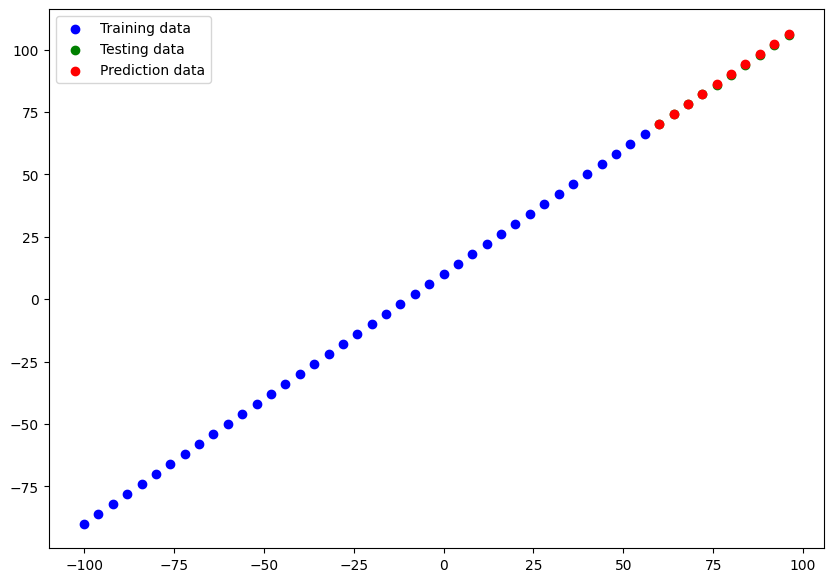

In [39]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [40]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.26347047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.07106709>)

In [41]:
model_2.predict([200.]) # Looks like it's working good without overfitting

1/1 [==============================] - 0s 71ms/step


array([[210.69485]], dtype=float32)

## Compare the results of our experiments

We've run a few experiments now. Let's compare the results.

You want to start with small experiments (small models) and make sure they work and then increase their scale.

In [42]:
# Let's compare our models results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.31547,457.796692
1,model_2,0.26347,0.071067


In [43]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               256       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> **Note:** one of our goals would be to minimize the time between our eyperiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring our what does work.
"Experiment, experiment, experiment"

## Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.

When doing so, it can be tedious if you're running lots of experiments.
Luckily, there are tools to help us.

**Resources:**
* As you build more models, you'll want to look into using:
* TensorBoard - component of the Tensorflow library to help track modelling experiments (we'll see this one later)
* Weights and biases - a tool for tracking all kinds of ML experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab such as in a web application or a mobile app.

There are 2 main formats we can save our models to:
1. The SavedModel format
2. HDF5 format

In [44]:
# We saw that model_2 works best and we want to save it using SavedModel format
model_2.save('best_model_SavedModel_format')

In [45]:
# Save it into HDF5 format
model_2.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# Load a saved model format
saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
saved_model.predict([200.0])

1/1 [==============================] - 0s 59ms/step


array([[210.69485]], dtype=float32)

In [47]:
# Load a HDF5 model format
h5_model = tf.keras.models.load_model('model_2.h5')
h5_model.predict([200.0])

1/1 [==============================] - 0s 61ms/step


array([[210.69485]], dtype=float32)

In [48]:
model_2.predict([200.0])

1/1 [==============================] - 0s 32ms/step


array([[210.69485]], dtype=float32)

In [49]:
h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               256       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Assertion does not throw error so the models are the same
assert saved_model.predict([200.0]) == h5_model.predict([200.0]) == model_2.predict([200.0])

1/1 [==============================] - 0s 31ms/step


## Download the model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. Go to the files tab and right click on the file and click download
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Drive and copy it there (second code cell)

In [51]:
# Download a file from Colab
from google.colab import files
files.download("/content/model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# !cp /content/model_2.h5 /content/drive/MyDrive...

## A larger example

In [53]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [54]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Read in the insurance dataset
data_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(data_url)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
# Let's try one-hot encode our dataframe
df = pd.get_dummies(insurance)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [57]:
X = np.asarray(df.drop('charges', axis=1)).astype(np.float32)
y = np.asarray(df['charges']).astype(np.float32)

In [58]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test)

(1070, 268)

In [59]:
X_train.shape, y_train.shape

((1070, 11), (1070,))

In [60]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 9385.0049 - mae: 9385.0049
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 8556.1104 - mae: 8556.1104
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 8493.0967 - mae: 8493.0967
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 8580.5742 - mae: 8580.5742
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 8572.0156 - mae: 8572.0156
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 8579.4180 - mae: 8579.4180
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8489.5449 - mae: 8489.5449
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8490.3994 - mae: 8490.3994
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 8555.6738 - mae: 8555.6738
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 8526.3486 - mae: 8526.3486

In [61]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8680.0547 - mae: 8680.0547


[8680.0546875, 8680.0546875]

In [62]:
np.median(y_train), np.mean(y_train) # It's performing really bad considering the median and mean

(9575.442, 13346.09)

In [63]:
X_train.shape

(1070, 11)

In [76]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

history = insurance_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 3s 6ms/step - loss: 9938.1748 - mae: 9938.1748
Epoch 2/50
34/34 [==============================] - 0s 6ms/step - loss: 7270.9868 - mae: 7270.9868
Epoch 3/50
34/34 [==============================] - 0s 7ms/step - loss: 6744.4351 - mae: 6744.4351
Epoch 4/50
34/34 [==============================] - 0s 6ms/step - loss: 6399.8950 - mae: 6399.8950
Epoch 5/50
34/34 [==============================] - 0s 6ms/step - loss: 6016.0742 - mae: 6016.0742
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 5319.0391 - mae: 5319.0391
Epoch 7/50
34/34 [==============================] - 0s 6ms/step - loss: 4179.0767 - mae: 4179.0767
Epoch 8/50
34/34 [==============================] - 0s 7ms/step - loss: 3794.3293 - mae: 3794.3293
Epoch 9/50
34/34 [==============================] - 0s 7ms/step - loss: 3449.7913 - mae: 3449.7913
Epoch 10/50
34/34 [==============================] - 0s 6ms/step - loss: 3295.9866 - mae: 3295.9866
Epoch 11/

Text(0.5, 0, 'epochs')

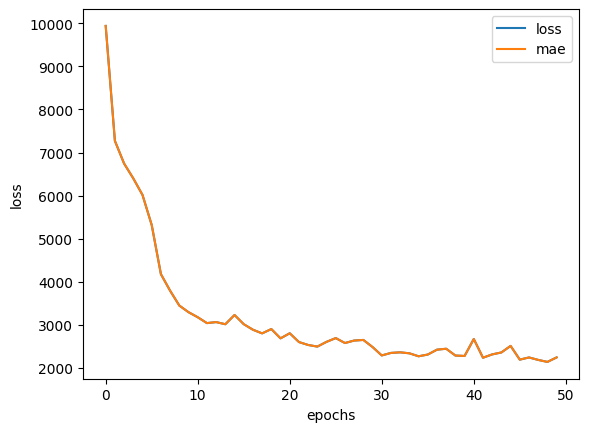

In [77]:
# Plot history (also knows as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [78]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 7ms/step - loss: 1922.5156 - mae: 1922.5156


[1922.515625, 1922.515625]

**Question:** How long should you train for?

Tensorflow has the solution which is called EarlyStopping callback! It basically stops training once the loss has stopped improving

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization. If you're not sure on which to use, you could try both and see which performs better.

In [73]:
X_train, y_train

(array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
        [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
        [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]],
       dtype=float32),
 array([ 9193.839,  8534.672, 27117.994, ..., 11931.125, 46113.51 ,
        10214.636], dtype=float32))

In [81]:
X = df.drop('charges', axis=1).astype(np.float32)
y = df['charges'].astype(np.float32)

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: ylabel='Frequency'>

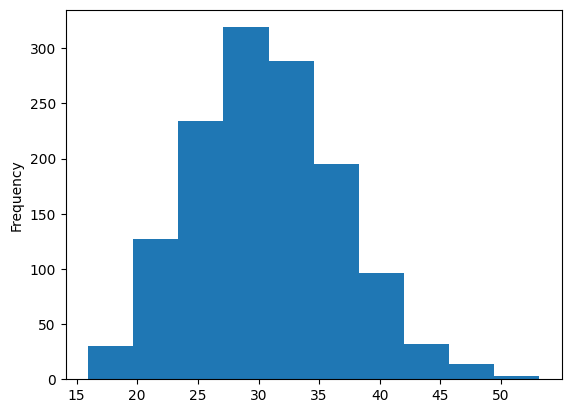

In [83]:
X['bmi'].plot(kind='hist')

In [84]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
data_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(data_url)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and one hot encoding
# It's important to fit transformer only on train data since test data is unknown
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [89]:
# What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [90]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one-hot encoded. Now let's build a neural network model and see how it goes

In [104]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=['mae'])

history = insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 7868.6450 - mae: 7868.6450
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 3910.3594 - mae: 3910.3594
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 3499.3828 - mae: 3499.3828
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 3298.5935 - mae: 3298.5935
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 3021.7175 - mae: 3021.7175
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 2918.8186 - mae: 2918.8186
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 3031.3950 - mae: 3031.3950
Epoch 8/100
34/34 [==============================] - 0s 9ms/step - loss: 2645.1487 - mae: 2645.1487
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 2430.9058 - mae: 2430.9058
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 2490.5515 - mae: 2490.5515

In [105]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1740.0194 - mae: 1740.0194


[1740.0194091796875, 1740.0194091796875]

Text(0.5, 0, 'epochs')

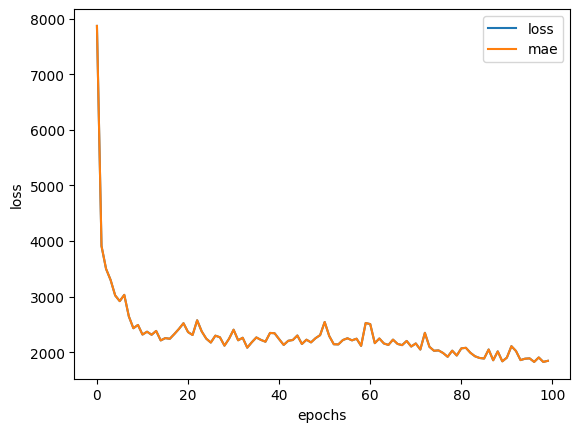

In [106]:
# Plot history (also knows as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
